In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/gpa_tracker_ds.csv")

# Rename columns (if needed)
df.columns = [
    'stu_id', 'name', 'semester_id',
    'avg_grade', 'attendance_percentage',
    'assessment_count', 'avg_score'
]

# Convert numeric columns
df['stu_id'] = df['stu_id'].astype(int)
df['semester_id'] = df['semester_id'].astype(int)
df['avg_grade'] = df['avg_grade'].astype(float)
df['attendance_percentage'] = df['attendance_percentage'].astype(float)
df['avg_score'] = df['avg_score'].astype(float)

# Group by student and semester
grouped = df.groupby(['stu_id', 'name', 'semester_id']).agg(
    avg_gpa=('avg_grade', 'mean'),
    avg_attendance=('attendance_percentage', 'mean'),
    total_assessments=('assessment_count', 'count'),
    avg_assessment_score=('avg_score', 'mean')
).reset_index()

# Sort for correct ordering
grouped.sort_values(by=['stu_id', 'semester_id'], inplace=True)

# Add previous GPA and drop label
grouped['prev_gpa'] = grouped.groupby('stu_id')['avg_gpa'].shift(1)
grouped['gpa_drop'] = (grouped['avg_gpa'] < grouped['prev_gpa']).astype(int)

# Reorder columns to match your desired output
grouped = grouped[[
    'stu_id', 'name', 'semester_id',
    'avg_gpa', 'avg_attendance',
    'avg_assessment_score', 'total_assessments',
    'prev_gpa', 'gpa_drop'
]]

# Rename columns to match expected format
grouped.columns = [
    'stu_id', 'name', 'semester_id',
    'avg_grade', 'attendance_percentage',
    'avg_score', 'assessment_count',
    'prev_gpa', 'gpa_drop'
]

# Print sample result
print(grouped.head())

# Save cleaned file
grouped.to_csv("../data/cleaned_gpa_data.csv", index=False)

   stu_id              name  semester_id  avg_grade  attendance_percentage  \
0       1     Rachel Arnold            1  55.000000              60.750000   
1       1     Rachel Arnold            2  82.333333              78.666667   
2       1     Rachel Arnold            3  55.333333              65.000000   
3       2  Jennifer Roberts            1  50.500000              71.500000   
4       2  Jennifer Roberts            2  63.000000              52.000000   

   avg_score  assessment_count   prev_gpa  gpa_drop  
0  56.082500                 4        NaN         0  
1  67.780000                 3  55.000000         0  
2  48.336667                 3  82.333333         1  
3  57.165000                 2        NaN         0  
4  59.000000                 2  50.500000         0  


In [13]:
# create a new df for cleaned data and drop duplicates and nan
cleaned_df = grouped.drop_duplicates()
# Fill NaN values in 'prev_gpa' with 0 (or another appropriate value)
cleaned_df['prev_gpa'] = cleaned_df['prev_gpa'].fillna(0)
# round the av grade, attendance, and assessment score to 1 decimal places
cleaned_df['avg_grade'] = cleaned_df['avg_grade'].round(1)
cleaned_df['attendance_percentage'] = cleaned_df['attendance_percentage'].round(1)
cleaned_df['avg_score'] = cleaned_df['avg_score'].round(1)
cleaned_df['prev_gpa'] = cleaned_df['prev_gpa'].round(1)
# Convert columns to appropriate data types
cleaned_df['stu_id'] = cleaned_df['stu_id'].astype(int)
cleaned_df['semester_id'] = cleaned_df['semester_id'].astype(int)
cleaned_df['avg_grade'] = cleaned_df['avg_grade'].astype(float)
cleaned_df['attendance_percentage'] = cleaned_df['attendance_percentage'].astype(float)
cleaned_df['avg_score'] = cleaned_df['avg_score'].astype(float)
cleaned_df['prev_gpa'] = cleaned_df['prev_gpa'].astype(float)
cleaned_df['gpa_drop'] = cleaned_df['gpa_drop'].astype(bool)
cleaned_df.to_csv("../data/cleaned_gpa_data.csv", index=False)
cleaned_df.head(20)


,stu_id,name,semester_id,avg_grade,attendance_percentage,avg_score,assessment_count,prev_gpa,gpa_drop
0,1,Rachel Arnold,1,55.0,60.8,56.1,4,0.0,False
1,1,Rachel Arnold,2,82.3,78.7,67.8,3,55.0,False
2,1,Rachel Arnold,3,55.3,65.0,48.3,3,82.3,True
3,2,Jennifer Roberts,1,50.5,71.5,57.2,2,0.0,False
4,2,Jennifer Roberts,2,63.0,52.0,59.0,2,50.5,False
5,2,Jennifer Roberts,3,73.0,83.3,81.1,3,63.0,False
6,3,Leah Owens,1,92.3,81.3,73.1,3,0.0,False
7,3,Leah Owens,2,83.7,85.0,83.0,3,92.3,True
8,3,Leah Owens,3,72.0,73.5,80.8,2,83.7,True
9,4,Steven Mcknight,1,82.2,76.0,71.8,3,0.0,False


In [14]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import joblib

# Define features and targets
X = cleaned_df[['semester_id', 'avg_grade', 'attendance_percentage', 'avg_score', 'assessment_count']]
y = cleaned_df[['gpa_drop']]  # Or multi-label if you want to predict sem2 and sem3 separately

# Define input features
X = cleaned_df[[
    'semester_id', 'avg_grade', 'attendance_percentage',
    'avg_score', 'assessment_count'
]]

# Define target
y = cleaned_df['gpa_drop']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Save model
# joblib.dump(model, "final_app/models/gpa_drop_model.pkl")
# print("✅ Model saved at final_app/models/gpa_drop_model.pkl")

In [15]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled if name == "Logistic Regression" else X_train, y_train)
    preds = model.predict(X_test_scaled if name == "Logistic Regression" else X_test)
    
    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'report': classification_report(y_test, preds)
    }
    
    print(f"✅ {name} trained")

print("\n--- Model Performance ---")
for name, res in results.items():
    print(f"\n{name}")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print(res['report'])

✅ Random Forest trained
✅ Logistic Regression trained
✅ XGBoost trained

--- Model Performance ---

Random Forest
Accuracy: 0.8389
              precision    recall  f1-score   support

       False       0.87      0.90      0.88       121
        True       0.78      0.71      0.74        59

    accuracy                           0.84       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.84      0.84      0.84       180


Logistic Regression
Accuracy: 0.7778
              precision    recall  f1-score   support

       False       0.81      0.88      0.84       121
        True       0.69      0.58      0.63        59

    accuracy                           0.78       180
   macro avg       0.75      0.73      0.74       180
weighted avg       0.77      0.78      0.77       180


XGBoost
Accuracy: 0.8222
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       121
        True       0.73      0.73      0.7

c:\Users\dadia\.vscode\Python-Y2\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:39:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
# Find best model by accuracy
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = models[best_model_name]

# Retrain on full data
best_model.fit(X_scaled if best_model_name == "Logistic Regression" else X, y)

# Save best model
joblib.dump(best_model, "../final_app/models/gpa_drop_model.pkl")
print(f"✅ Best model '{best_model_name}' saved with accuracy: {results[best_model_name]['accuracy']:.4f}")

✅ Best model 'Random Forest' saved with accuracy: 0.8389


In [17]:
from sklearn.metrics import classification_report

# Assume you have test data: X_test, y_test
y_pred = best_model.predict(X_test)

# Get detailed metrics
report = classification_report(y_test, y_pred, output_dict=True)

# Extract key metrics
metrics = {
    'accuracy': results[best_model_name]['accuracy'],  # From your existing results dict
    'precision': report['weighted avg']['precision'],
    'recall': report['weighted avg']['recall'],
    'f1_score': report['weighted avg']['f1-score'],
    'model_name': best_model_name
}

# Save metrics
joblib.dump(metrics, "../final_app/models/gpa_drop_model_metrics.pkl")
print(f"📊 Model metrics saved:\n{metrics}")

📊 Model metrics saved:
{'accuracy': 0.8388888888888889, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0, 'model_name': 'Random Forest'}


C:\Users\dadia\AppData\Local\Temp\ipykernel_17200\453305896.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x='gpa_drop', palette="viridis")


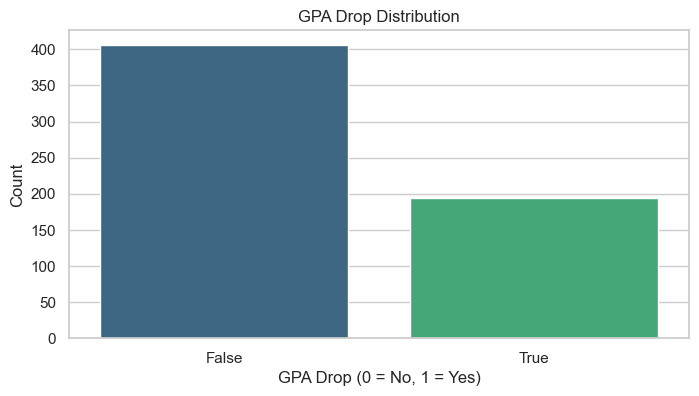

In [57]:
def predict_risk(semester_id, avg_grade, attendance_percentage, avg_score, assessment_count):
    input_df = pd.DataFrame([{
        'semester_id': semester_id,
        'avg_grade': avg_grade,
        'attendance_percentage': attendance_percentage,
        'avg_score': avg_score,
        'assessment_count': assessment_count
    }])
    
    prediction = best_model.predict(input_df)[0]
    return "⚠️ GPA may drop!" if prediction == 1 else "✅ GPA is stable."

# Example usage
predict_risk(2, 75, 80, 70, 3)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(data=cleaned_df, x='gpa_drop', palette="viridis")
plt.title("GPA Drop Distribution")
plt.xlabel("GPA Drop (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()